In [4]:
import numpy as np 
import pandas as pd 
clean_grid = pd.read_csv('processed_grid_data.csv')
clean_grid


,Timestamp,Current_Substation_01,Current_Substation_02,Current_Substation_03,Current_Substation_04,Current_Substation_05,Current_Substation_06,Current_Substation_07,Current_Substation_08,Current_Substation_09,...,Voltage_Substation_01,Voltage_Substation_02,Voltage_Substation_03,Voltage_Substation_04,Voltage_Substation_05,Voltage_Substation_06,Voltage_Substation_07,Voltage_Substation_08,Voltage_Substation_09,Voltage_Substation_10
0,2025-01-01 10:00:00.000,100.027662,100.105305,100.246765,100.337858,101.304905,99.936636,100.575731,99.009830,100.127701,...,229.985283,230.275779,230.035105,230.176336,229.696622,229.848098,229.409985,230.036511,229.791457,229.276189
1,2025-01-01 10:00:00.100,100.027662,100.105305,100.246765,100.337858,100.016467,99.936636,100.575731,99.009830,101.026966,...,229.985283,230.275779,230.035105,230.176336,230.105314,229.848098,229.409985,230.036511,229.896151,229.276189
2,2025-01-01 10:00:00.200,100.027662,100.105305,100.246765,100.337858,99.907772,99.936636,100.575731,99.009830,100.565920,...,229.985283,230.275779,230.035105,230.176336,229.980025,229.848098,229.409985,230.036511,229.605356,229.918102
3,2025-01-01 10:00:00.300,100.027662,100.700041,100.246765,100.337858,100.475311,99.936636,100.575731,99.009830,101.211235,...,229.985283,230.002881,230.035105,230.176336,230.096259,229.848098,229.409985,230.036511,230.306430,229.850425
4,2025-01-01 10:00:00.400,100.027662,100.113789,100.678401,100.337858,101.079990,99.936636,99.945964,100.429946,100.036808,...,229.985283,229.803380,230.527992,230.176336,229.936760,229.848098,230.418288,230.200895,229.939736,229.920462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2025-01-01 10:01:00.200,95.128911,94.203011,95.129881,94.198529,95.556417,94.728895,94.978592,94.780035,93.684387,...,228.966604,229.977935,231.134668,227.158668,234.922166,230.843829,229.915857,230.301710,230.042773,230.052497
603,2025-01-01 10:01:00.300,95.128911,94.717909,94.855389,94.198529,94.861680,94.728895,94.379927,95.206709,93.684387,...,228.966604,228.962788,229.662379,227.158668,230.081838,230.843829,229.750749,230.272239,230.042773,229.503469
604,2025-01-01 10:01:00.400,95.128911,94.717909,95.809853,94.198529,94.131805,94.728895,95.062388,94.430668,93.684387,...,228.966604,228.962788,227.998861,227.158668,231.822128,230.843829,230.149725,229.746834,230.042773,229.526355
605,2025-01-01 10:01:00.500,95.128911,94.717909,95.809853,94.198529,94.131805,94.728895,94.365432,94.455983,93.684387,...,228.966604,228.962788,227.998861,227.158668,231.822128,230.843829,229.810383,230.014014,230.042773,229.526355


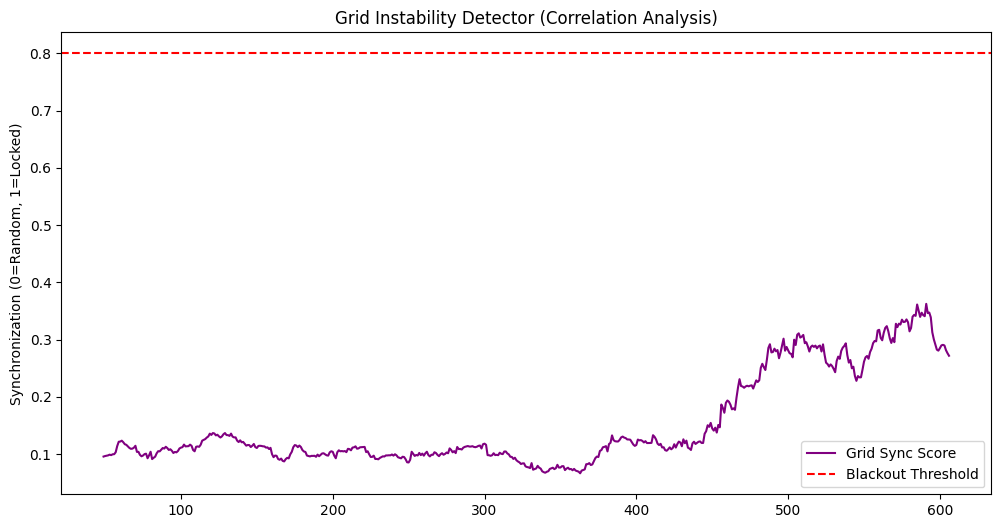

In [6]:
# 1. Isolate the "Frequency" columns (The Heartbeat)
# We only care about how these columns move relative to each other
freq_df = clean_grid.filter(like="Frequency")

# 2. Calculate Rolling Correlation (The "Scared Dog" Detector)
# window=50 means "Look at the last 5 seconds"
# .corr() calculates a massive table of how every sensor relates to every other sensor
# This step is computationally heavy!
rolling_corr = freq_df.rolling(window=50).corr()

# 3. Collapse into a Single "Sync Score"
# We just want the average of all those numbers.
# If the average is high, everything is moving together.
sync_score = rolling_corr.groupby(level=0).mean().mean(axis=1)
# 4. Plot the Result
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sync_score.index, sync_score, color='purple', label="Grid Sync Score")
plt.axhline(y=0.8, color='red', linestyle='--', label="Blackout Threshold")
plt.title("Grid Instability Detector (Correlation Analysis)")
plt.ylabel("Synchronization (0=Random, 1=Locked)")
plt.legend()
plt.show()

In [8]:
# 1. Isolate the "Frequency" columns (The Heartbeat)
# We only care about how these columns move relative to each other
freq_df = clean_grid.filter(like="Frequency")

# 2. Calculate Rolling Correlation (The "Scared Dog" Detector)
# window=50 means "Look at the last 5 seconds"
# .corr() calculates a massive table of how every sensor relates to every other sensor
# This step is computationally heavy!
rolling_corr = freq_df.rolling(window=50).corr()

# 3. Collapse into a Single "Sync Score"
# We just want the average of all those numbers.
# If the average is high, everything is moving together.
sync_score = rolling_corr.groupby(level=0).mean().mean(axis=1)

In [9]:
freq_df

,Frequency_Substation_01,Frequency_Substation_02,Frequency_Substation_03,Frequency_Substation_04,Frequency_Substation_05,Frequency_Substation_06,Frequency_Substation_07,Frequency_Substation_08,Frequency_Substation_09,Frequency_Substation_10
0,60.003429,59.996370,60.003505,60.007458,60.006110,59.998445,60.000099,59.995008,60.011829,59.991465
1,60.003429,59.996370,60.003505,60.007458,60.002410,59.998445,60.000099,59.995008,60.000884,59.991465
2,60.003429,59.996370,60.003505,60.007458,59.997337,59.998445,60.000099,59.995008,60.000601,59.998132
3,60.003429,60.004537,60.003505,60.007458,59.999589,59.998445,60.000099,59.995008,59.998614,60.000849
4,60.003429,59.999444,60.001824,60.007458,60.000710,59.998445,60.005168,59.992705,60.000780,60.002162
...,...,...,...,...,...,...,...,...,...,...
602,59.498359,59.503711,59.507899,59.492529,59.504309,59.996011,60.003928,60.009219,59.989359,59.995939
603,59.498359,59.504990,59.506750,59.492529,59.500482,59.996011,60.005572,60.004585,59.989359,59.994669
604,59.498359,59.504990,59.494220,59.492529,59.508370,59.996011,60.003581,60.004994,59.989359,60.008823
605,59.498359,59.504990,59.494220,59.492529,59.508370,59.996011,60.006134,59.997827,59.989359,60.008823


In [14]:
rolling_corr.to_csv('rolling_correlation.csv')

In [15]:
sync_score.to_csv("Sync_scre.csv")